In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___healthy/Potato_healthy-66-_0_305.jpg
/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___healthy/Potato_healthy-55-_0_178.jpg
/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___healthy/Potato_healthy-69-_0_9193.jpg
/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___healthy/Potato_healthy-73-_0_9057.jpg
/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___healthy/Potato_healthy-72-_0_5665.jpg
/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___healthy/Potato_healthy-57-_0_3897.jpg
/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___healthy/Potato_healthy-68-_0_3217.jpg
/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___healthy/Potato_healthy-71-_0_5097.jpg
/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___healthy/Potato_healthy-70-_0_8201.jpg
/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___healthy/Potato_healt

In [66]:
import tensorflow  as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from sklearn.utils import shuffle

In [67]:
train_ds_raw=keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/potato-leaf-disease-dataset/Potato/Train",
    labels="inferred",
    label_mode = "int",
    batch_size=32,
    image_size=(256,256),
 shuffle=True
)

Found 900 files belonging to 3 classes.


In [68]:
valid_ds=keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/potato-leaf-disease-dataset/Potato/Valid",
    labels="inferred",
    label_mode = "int",
    batch_size=32,
    image_size=(256,256),
    shuffle=True
)

Found 300 files belonging to 3 classes.


In [69]:
test_ds=keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/potato-leaf-disease-dataset/Potato/Test",
    labels="inferred",
    label_mode = "int",
    batch_size=32,
    image_size=(256,256),
    shuffle=True 
)

Found 300 files belonging to 3 classes.


In [70]:
import tensorflow as tf

# Normalize the image by dividing by 255
def process(image, label):
    image = tf.cast(image, tf.float32)  # Ensure image is in float32 for processing
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

# Apply the process function to all datasets
train_ds = train_ds_raw.map(process)
valid_ds = valid_ds.map(process)
test_ds = test_ds.map(process)




In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))  # Output layer with 3 classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoding
              metrics=['accuracy'])


In [72]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 62, 62, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,427 (56.64 MB)

 Trainable params: 14,847,427 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
#model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [74]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

history=model.fit(train_ds,epochs=30,validation_data=valid_ds, callbacks=[early_stopping])

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.3167 - loss: 3.7337 - val_accuracy: 0.3333 - val_loss: 2.1420
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.3403 - loss: 1.9671 - val_accuracy: 0.3333 - val_loss: 1.6205
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.3557 - loss: 1.5640 - val_accuracy: 0.3333 - val_loss: 1.4396
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.3853 - loss: 1.4092 - val_accuracy: 0.4567 - val_loss: 1.2010
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5332 - loss: 1.2407 - val_accuracy: 0.6167 - val_loss: 1.1719
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5889 - loss: 1.2119 - val_accuracy: 0.6467 - val_loss: 1.0253
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6544 - loss: 1.0847 - val_accuracy: 0.7567 - val_loss: 0.8490
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7408 - loss: 0.8905 - val_accuracy: 0.8133 -

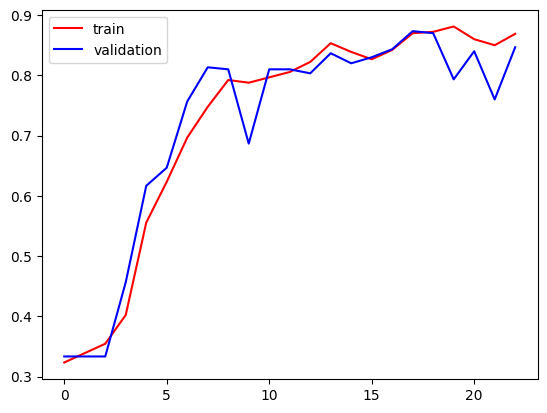

In [75]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="validation")
plt.legend()
plt.show()

In [76]:
import numpy as np
from sklearn.metrics import classification_report

# Collect labels from the test dataset
labels_list = []
for image, label in test_ds:
    labels_list.append(label)

y_test = np.concatenate(labels_list, axis=0)  # Combine all labels into one numpy array

# Make predictions
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)  # Convert softmax probabilities to class labels

# Print classification report
print(classification_report(y_test, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
              precision    recall  f1-score   support

           0       0.36      0.38      0.37       100
           1       0.31      0.22      0.26       100
           2       0.25      0.31      0.28       100

    accuracy                           0.30       300
   macro avg       0.31      0.30      0.30       300
weighted avg       0.31      0.30      0.30       300



In [77]:
import cv2

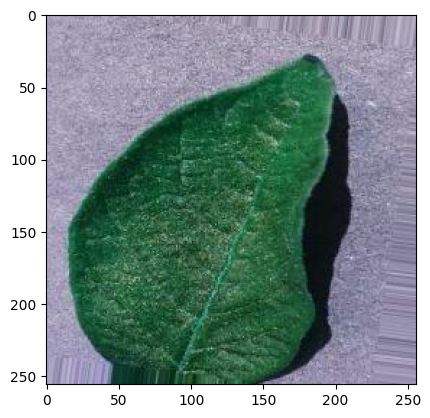

In [78]:
test_img= cv2.imread("/kaggle/input/potato-leaf-disease-dataset/Potato/Test/Potato___healthy/Potato_healthy-31-_0_2766.jpg")
test_image=test_img.reshape((1,256,256,3))
plt.imshow(test_img)

In [79]:
model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


array([[0., 0., 1.]], dtype=float32)

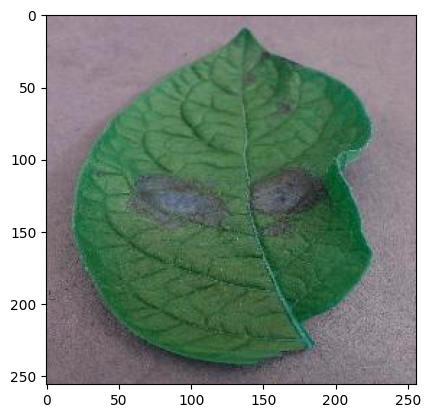

In [80]:

test_img2= cv2.imread("/kaggle/input/potato-leaf-disease-dataset/Potato/Test/Potato___Late_blight/58334b81-9aab-4b5c-b655-f7078a81135b___RS_LB 3846.JPG")
test_image2=test_img2.reshape((1,256,256,3))
plt.imshow(test_img2)

In [81]:
model.predict(test_image2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0., 0., 1.]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: 2


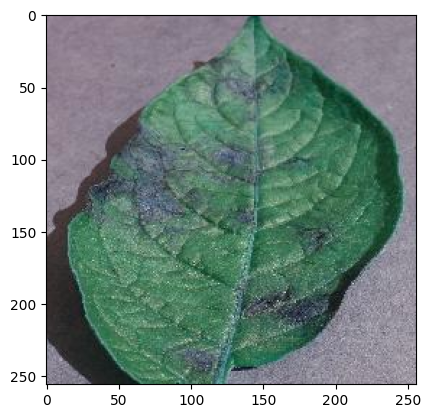

In [82]:
img=["/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___Late_blight/a6623827-bcdc-40ed-81e6-5cde1a1da997___RS_LB 3179.JPG","/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___Late_blight/ae966e38-73b3-47c1-9421-20ac2f570f46___RS_LB 3240.JPG","/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___Late_blight/a5028ead-ac95-4a90-89cb-aaac512d502a___RS_LB 3957.JPG"]

for i in img:
    test_img3= cv2.imread(i)
    test_image3=test_img3.reshape((1,256,256,3))
    plt.imshow(test_img3)
    #plt.show()
    predictions = model.predict(test_image3)
    predicted_class = np.argmax(predictions, axis=1)[0]
    print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: 1


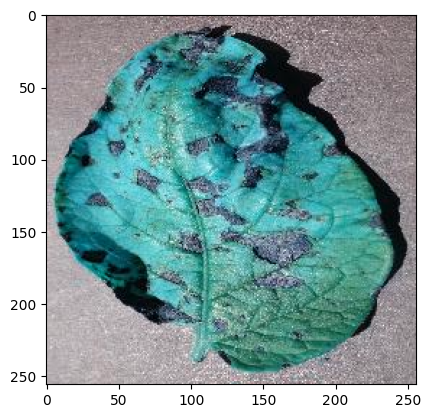

In [83]:
img2=["/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___Early_blight/ab23a940-3124-4101-b562-08ca34a8334b___RS_Early.B 7790.JPG","/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___Early_blight/72013507-bfce-4b7a-b56e-f66a94cb4558___RS_Early.B 7930.JPG","/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___Early_blight/86562214-f8b9-4105-9513-4847520aff9a___RS_Early.B 7515.JPG"]

for i in img2:
    test_img3= cv2.imread(i)
    test_image3=test_img3.reshape((1,256,256,3))
    plt.imshow(test_img3)
    #plt.show()
    predictions = model.predict(test_image3)
    predicted_class = np.argmax(predictions, axis=1)[0]
    print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: 2


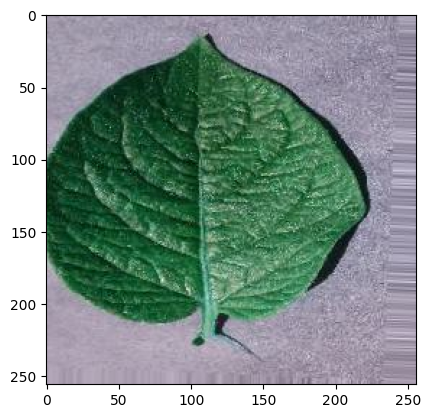

In [84]:
img3=["/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___healthy/Potato_healthy-75-_0_3868.jpg","/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_8624.jpg","/kaggle/input/potato-leaf-disease-dataset/Potato/Valid/Potato___healthy/Potato_healthy-70-_0_7278.jpg"]
for i in img3:
    test_img3= cv2.imread(i)
    test_image3=test_img3.reshape((1,256,256,3))
    plt.imshow(test_img3)
    #plt.show()
    predictions = model.predict(test_image3)
    predicted_class = np.argmax(predictions, axis=1)[0]
    print(f"Predicted Class: {predicted_class}")

In [87]:
model.save("cnn_model4.h5")  # Saves in HDF5 format



In [86]:
class_names = train_ds_raw.class_names
print("Class Index Mapping:", class_names)

Class Index Mapping: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
